# **REGRESI GAMA (GLMS)**

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

data = pd.read_csv('data.csv')

In [ ]:
data

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


**EDA**

In [ ]:
# Eksplorasi data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB
None
               age          bmi     children       charges
count  3630.000000  3630.000000  3630.000000   3630.000000
mean     38.887036    30.629652     2.503581  12784.808644
std      12.151029     5.441307     1.712568  10746.166743
min      18.000000    15.960000     0.000000   1121.873900
25%      29.000000    26.694526     1.000000   5654.818262
50%      39.170922    30.200000     3.000000   9443.807222
75%      48.343281    34.100000     4.000000  14680.407505
ma

In [ ]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64


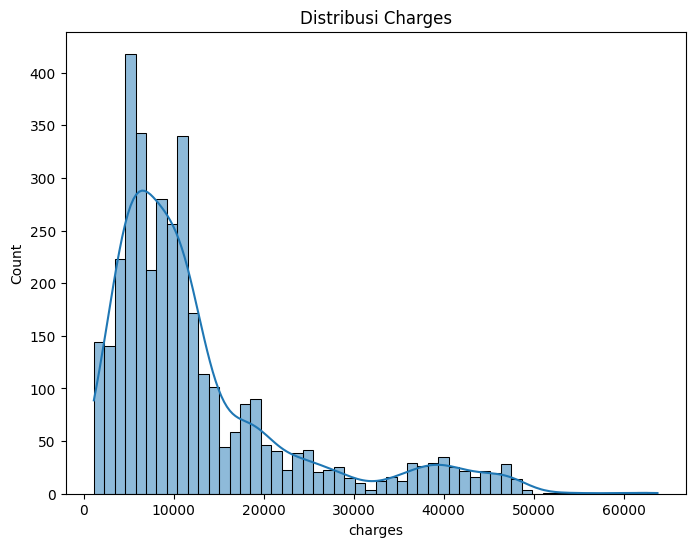

In [ ]:
# Cek distribusi target
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], kde=True)
plt.title('Distribusi Charges')
plt.show()

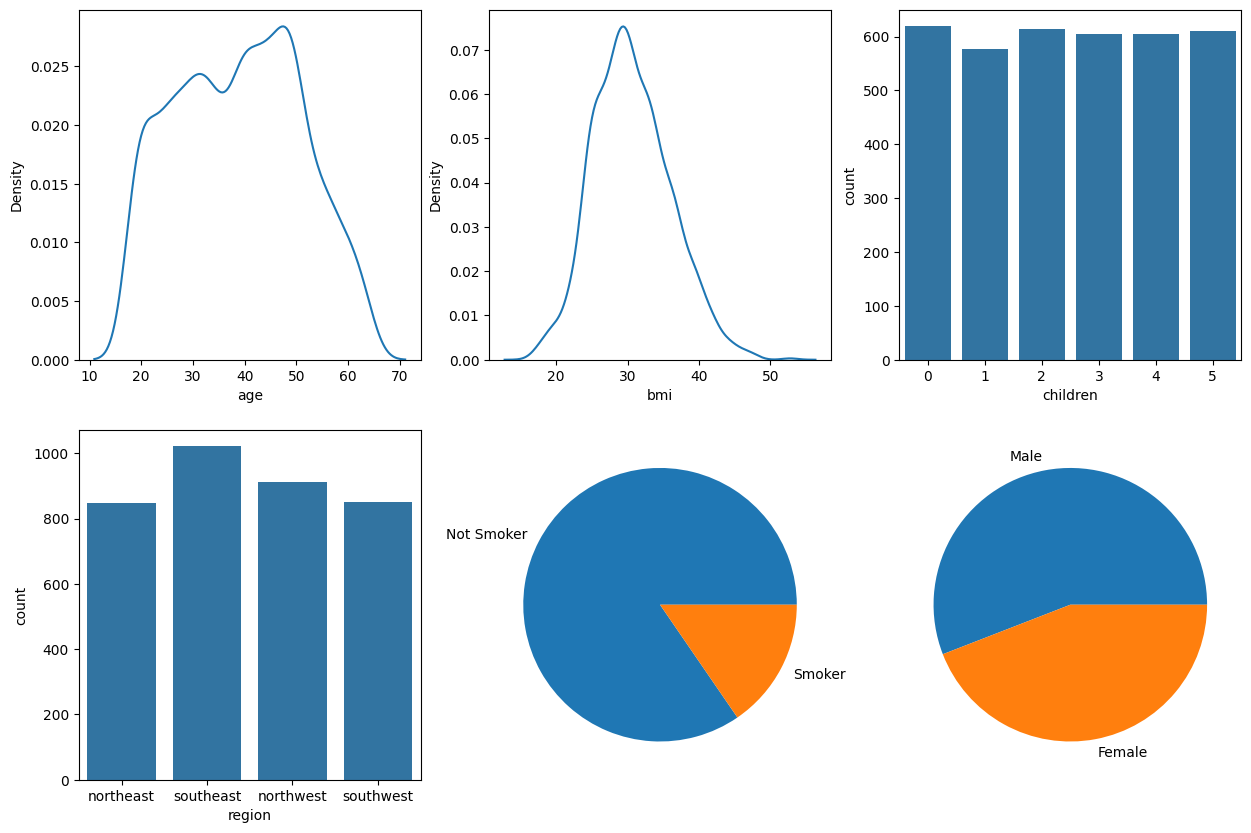

In [ ]:
fig,ax=plt.subplots(2,3, figsize=(15,10))
sns.kdeplot(data=data,x='age', ax=ax[0,0])
sns.kdeplot(data=data,x='bmi', ax=ax[0,1])
sns.countplot(data=data,x='children', ax=ax[0,2])
sns.countplot(data=data,x='region',ax=ax[1,0],)
plt.subplot(2,3,5)
plt.pie(data['smoker'].value_counts().values,labels=['Not Smoker','Smoker'])
plt.subplot(2,3,6)
plt.pie(data['sex'].value_counts().values,labels=['Male','Female'])
plt.show()

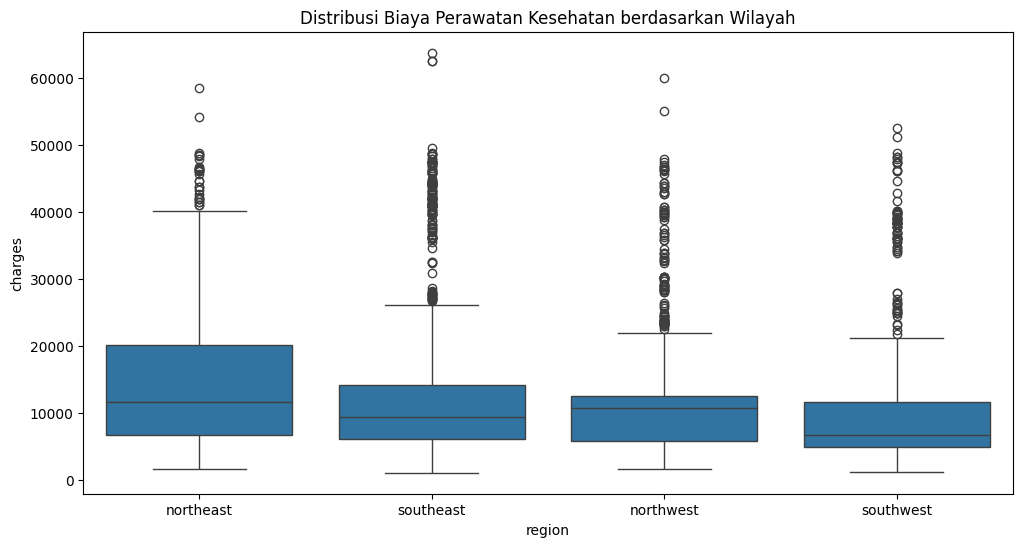

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Distribusi Biaya Perawatan Kesehatan berdasarkan Wilayah')
plt.show()

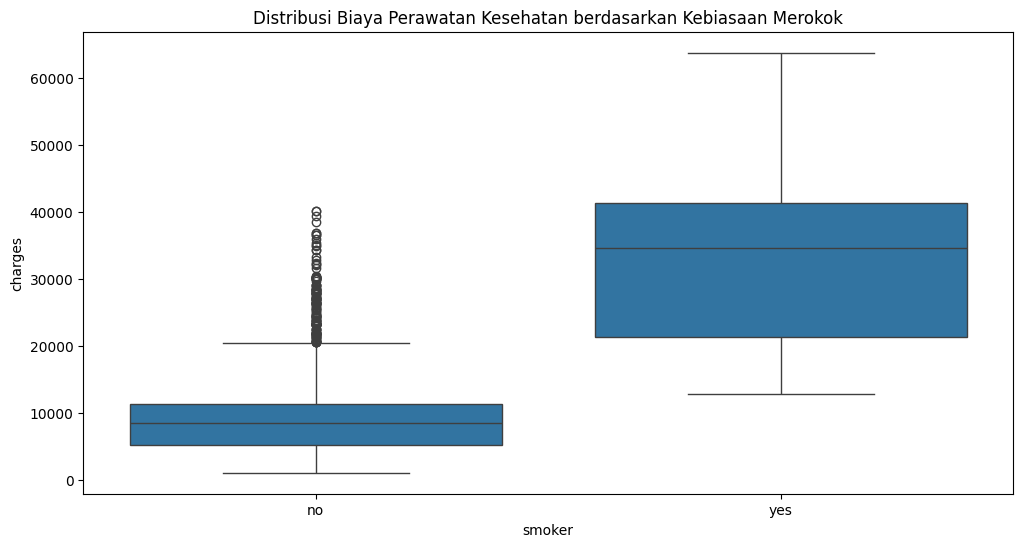

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Distribusi Biaya Perawatan Kesehatan berdasarkan Kebiasaan Merokok')
plt.show()

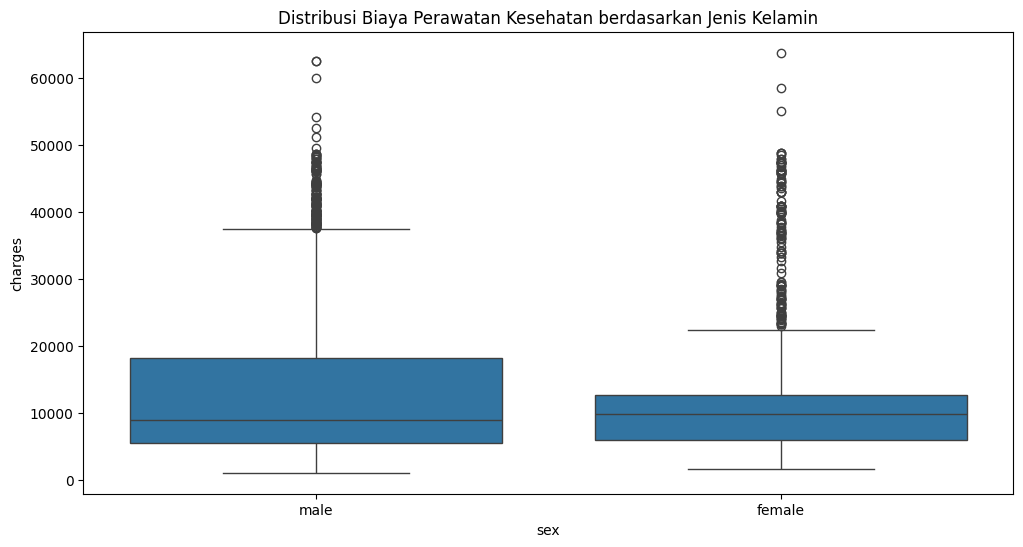

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Distribusi Biaya Perawatan Kesehatan berdasarkan Jenis Kelamin')
plt.show()

<ipython-input-14-2e36a1db67a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)


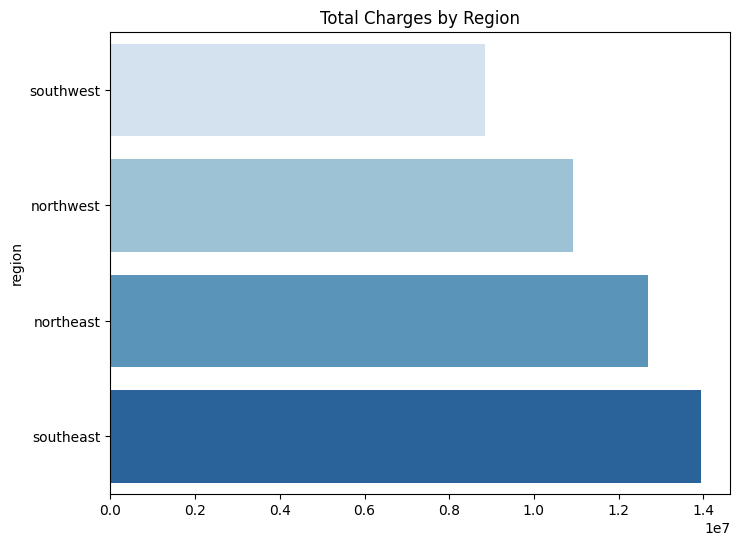

In [ ]:
# Menghitung total charges berdasarkan region dan mengurutkannya
charges = data['charges'].groupby(data['region']).sum().sort_values(ascending=True)

f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)
ax.set_title('Total Charges by Region')
plt.show()

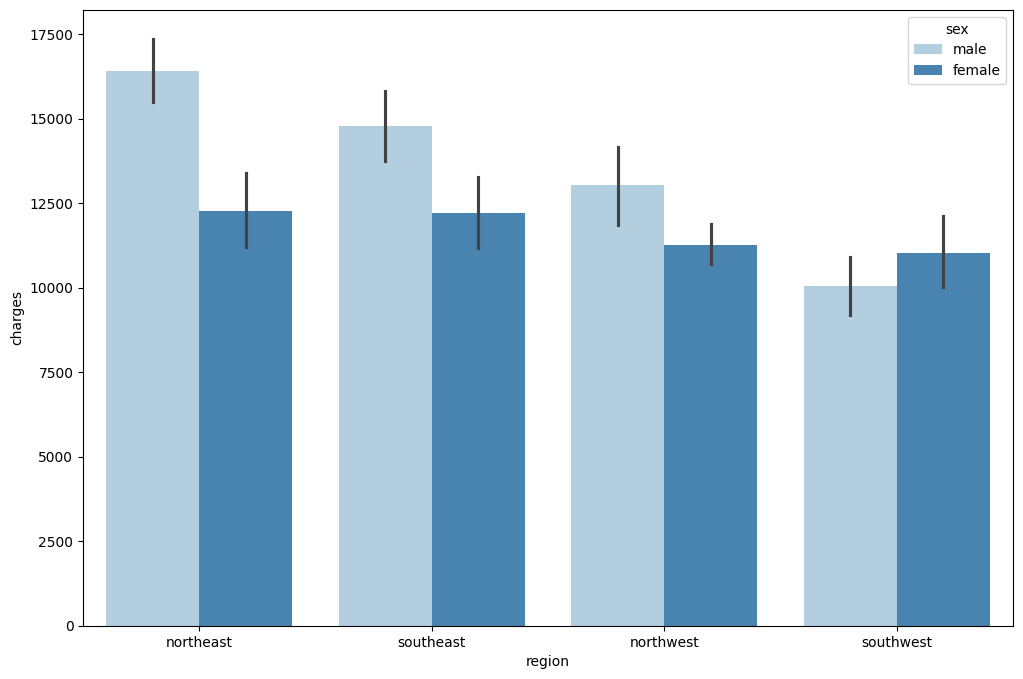

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=data, palette='Blues')


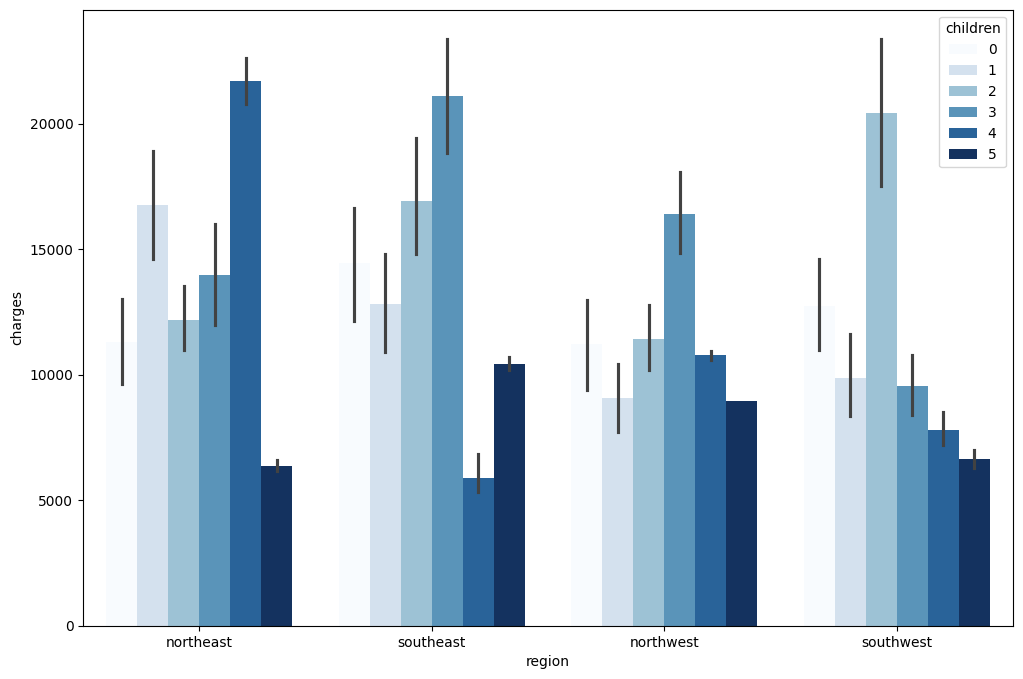

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='Blues')

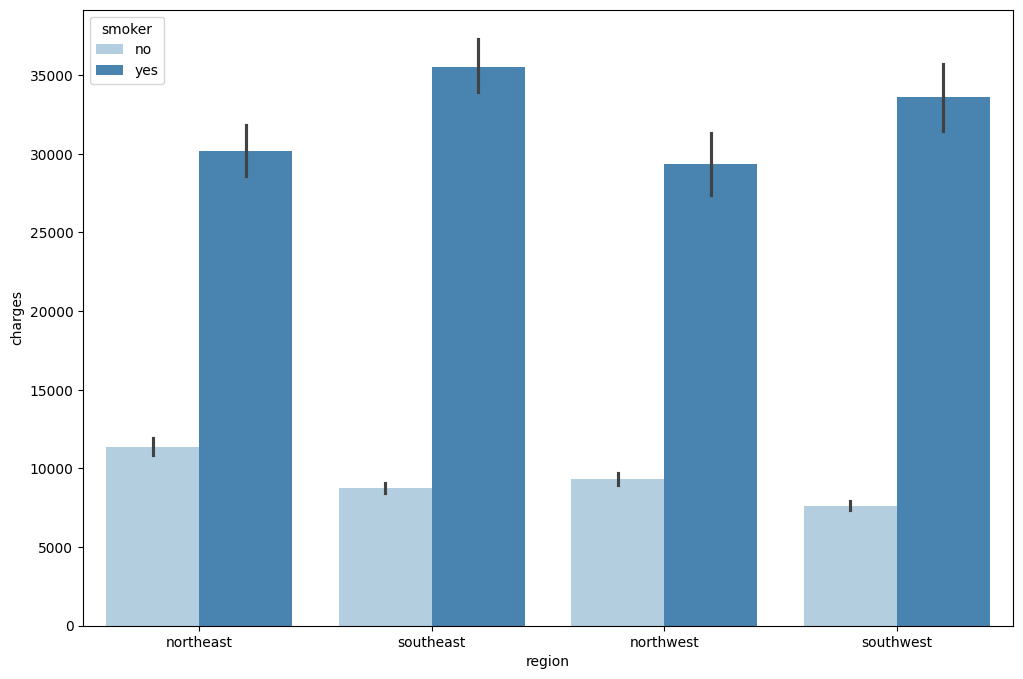

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=data, palette='Blues')


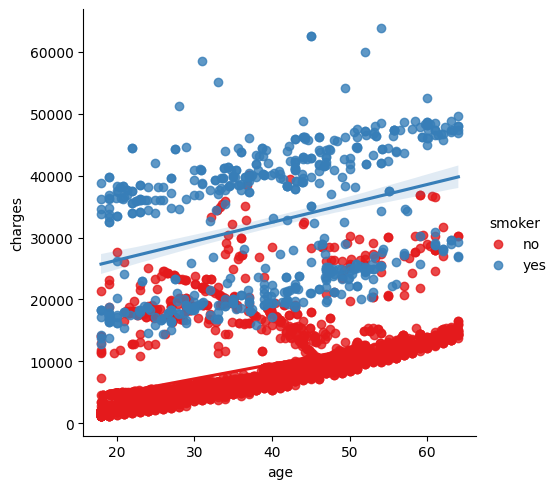

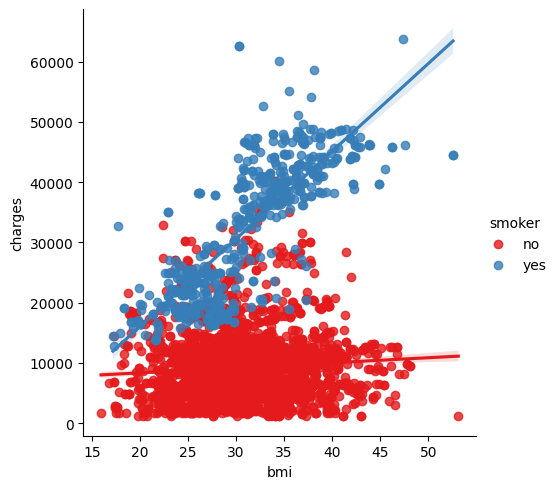

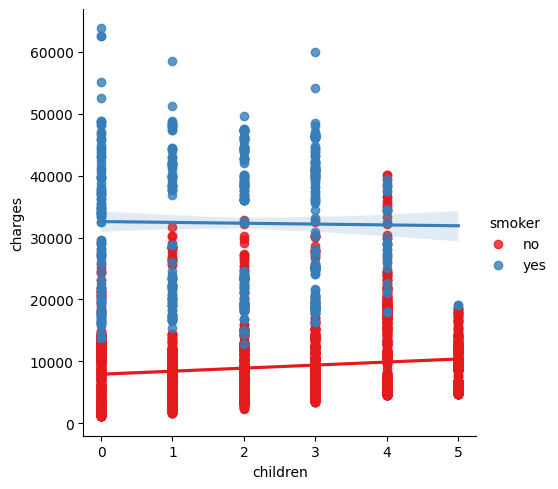

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set1')

ENCODER

In [118]:
##convert label objek ke kategorikal
data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')
data.dtypes

age          float64
sex         category
bmi          float64
smoker      category
region      category
children       int64
charges      float64
dtype: object

In [119]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

age         float64
sex           int64
bmi         float64
smoker        int64
region        int64
children      int64
charges     float64
dtype: object

In [120]:
data

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,0,0,2,3279.868550
1,36.976978,0,25.744165,1,2,3,21454.494239
2,18.000000,1,30.030000,0,2,1,1720.353700
3,37.000000,1,30.676891,0,0,3,6801.437542
4,58.000000,1,32.010000,0,2,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,1,4,10987.324964
3626,38.661977,0,26.202557,0,2,2,11735.844352
3627,56.000000,1,40.300000,0,3,0,10602.385000
3628,48.061207,0,34.930624,0,2,1,8976.140452


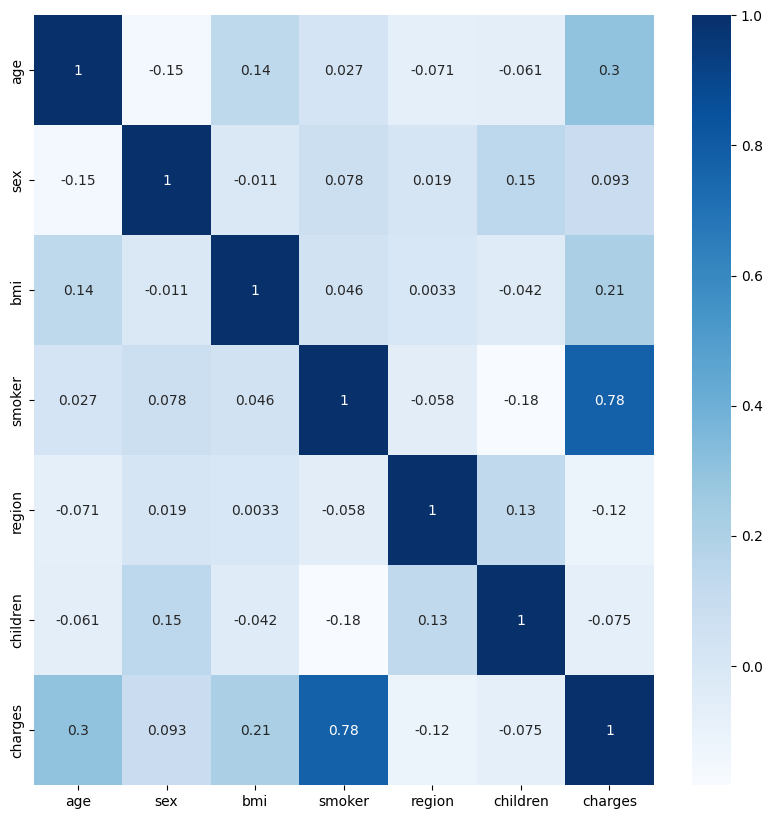

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='Blues')


In [121]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[['age', 'bmi', 'children']] = scaler.fit_transform(data[['age', 'bmi', 'children']])


In [122]:
data_normalized

,age,sex,bmi,smoker,region,children,charges
0,0.065217,1,0.263250,0,0,0.4,3279.868550
1,0.412543,0,0.263227,1,2,0.6,21454.494239
2,0.000000,1,0.378531,0,2,0.2,1720.353700
3,0.413043,1,0.395935,0,0,0.6,6801.437542
4,0.869565,1,0.431800,0,2,0.2,11946.625900
...,...,...,...,...,...,...,...
3625,0.670017,0,0.685149,0,1,0.8,10987.324964
3626,0.449173,0,0.275560,0,2,0.4,11735.844352
3627,0.826087,1,0.654829,0,3,0.0,10602.385000
3628,0.653504,0,0.510375,0,2,0.2,8976.140452


In [123]:
X = data_normalized.drop('charges', axis=1)
y = data_normalized['charges']
X = sm.add_constant(X)  # Tambahkan intercept

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

929      4900.321448
3587    11312.474463
3586    17942.106000
2344     7443.847665
1352    38239.411582
            ...     
1130    46412.533236
1294     7954.517000
860     62592.873090
3507     4343.586409
3174     9875.680400
Name: charges, Length: 2904, dtype: float64

In [124]:
gamma_model = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=sm.families.links.log()))
gamma_results = gamma_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [125]:
# Menampilkan ringkasan hasil regresi
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 2904
Model:                            GLM   Df Residuals:                     2897
Model Family:                   Gamma   Df Model:                            6
Link Function:                    log   Scale:                         0.31551
Method:                          IRLS   Log-Likelihood:                -28594.
Date:                Sun, 09 Jun 2024   Deviance:                       579.84
Time:                        16:54:02   Pearson chi2:                     914.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.7066
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2778      0.042    197.181      0.0

In [126]:
from sklearn.metrics import mean_absolute_error

# Prediksi menggunakan data uji
y_pred = gamma_results.predict(X_test)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 40425070.904653184
Root Mean Squared Error (RMSE): 6358.0713195632825
R^2 Score: 0.6491294280102919
Mean Absolute Error (MAE): 3852.821488931572


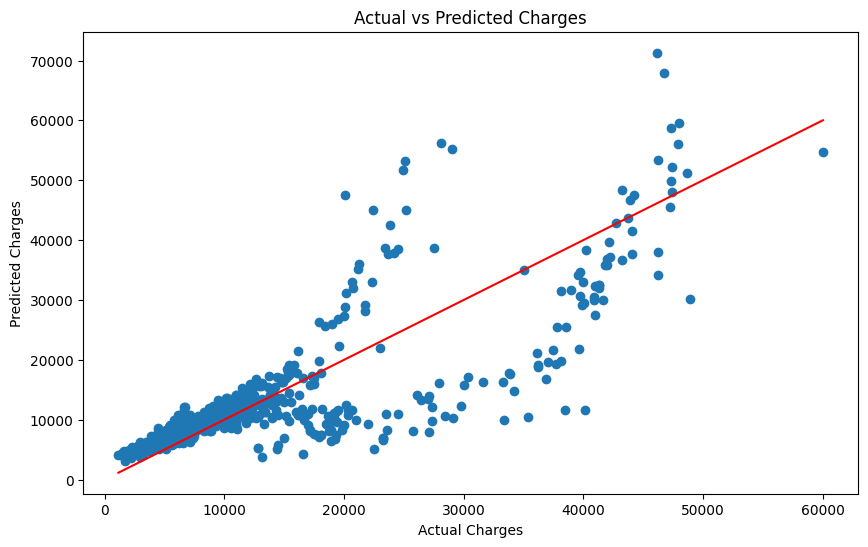

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.show()

# **DENGAN PCA**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Membaca data
data = pd.read_csv('Train_Data.csv')

# Eksplorasi data
print(data.info())
print(data.describe())

# Cek missing values
print(data.isnull().sum())

# Identifikasi kolom kategorikal dan numerik
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# One-hot encoding untuk kolom kategorikal
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(data[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Gabungkan kembali dengan data asli
data = data.drop(columns=categorical_features)
data = pd.concat([data, encoded_categorical_df], axis=1)

print("Hasil One-Hot Encoding:")
print(encoded_categorical_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB
None
               age          bmi     children       charges
count  3630.000000  3630.000000  3630.000000   3630.000000
mean     38.887036    30.629652     2.503581  12784.808644
std      12.151029     5.441307     1.712568  10746.166743
min      18.000000    15.960000     0.000000   1121.873900
25%      29.000000    26.694526     1.000000   5654.818262
50%      39.170922    30.200000     3.000000   9443.807222
75%      48.343281    34.100000     4.000000  14680.407505
ma

In [3]:
# Standarisasi kolom numerik
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Standarisasi seluruh data (numerik dan hasil encoding)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
# Menerapkan PCA dengan 5 komponen
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)

# Menampilkan hasil setelah PCA
print("\nDataFrame setelah PCA:")
df_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(5)])
print(df_pca.head())


DataFrame setelah PCA:
        PC1       PC2       PC3       PC4       PC5
0 -1.362296 -0.568219  0.248099 -1.495811 -0.007927
1  1.908408 -0.765771 -0.838767 -1.257974  0.924401
2 -0.884187 -0.965541 -1.375415 -1.526639  0.632891
3 -0.669254 -0.395153 -0.063544 -0.130548 -0.609451
4  0.771164 -0.240137 -1.690684  0.447705  0.360938


In [5]:
# Menambahkan intercept ke dalam model
data_pca = sm.add_constant(data_pca)

# Pembagian data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(data_pca, data['charges'], test_size=0.2, random_state=42)

In [6]:
data_pca

array([[ 1.        , -1.36229604, -0.56821922,  0.2480985 , -1.49581129,
        -0.0079266 ],
       [ 1.        ,  1.90840793, -0.76577055, -0.8387672 , -1.25797412,
         0.9244007 ],
       [ 1.        , -0.88418718, -0.96554078, -1.37541484, -1.52663911,
         0.63289147],
       ...,
       [ 1.        ,  0.18531519, -0.30031804,  1.03914293,  2.39436854,
         0.82481374],
       [ 1.        ,  0.47331132,  0.54705057, -1.93305003,  0.69084865,
         1.35562624],
       [ 1.        , -0.88593122,  0.50415878, -0.19331701, -0.35385319,
         0.55170939]])

In [7]:
# Melatih model regresi Gamma
gamma_model = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=sm.families.links.log())).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [8]:
# Menampilkan ringkasan hasil regresi
print(gamma_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 2904
Model:                            GLM   Df Residuals:                     2898
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                         0.14325
Method:                          IRLS   Log-Likelihood:                -27895.
Date:                Mon, 10 Jun 2024   Deviance:                       403.28
Time:                        07:48:54   Pearson chi2:                     415.
No. Iterations:                    17   Pseudo R-squ. (CS):             0.9561
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2318      0.007   1313.444      0.0

In [11]:
# Prediksi pada testing set
y_pred = gamma_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 44158070.78235818
Root Mean Squared Error (RMSE): 6645.1539321793125
R^2 Score: 0.6167287476152676
Mean Absolute Error (MAE): 3573.326983767415


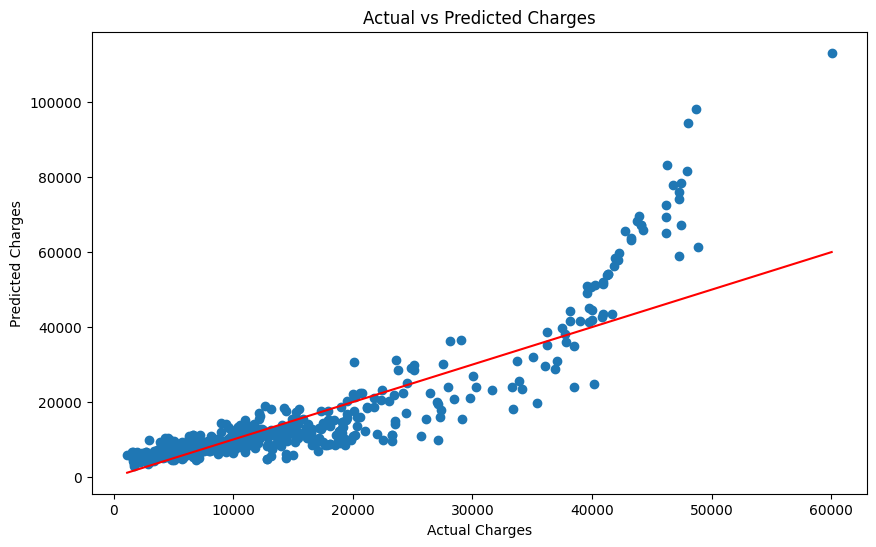

In [12]:
# Menampilkan plot scatter antara nilai prediksi dan nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.show()

______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________

______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________

______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________

______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________

______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________
______________________________________________________________